In [ ]:
# Importing Libraries I began by importing the core Python libraries required for data preprocessing, analysis, and visualization. 
# These are standard libraries used throughout machine learning and data science workflows.

import pandas as pd # Data manipulation and analysis.
import numpy as np # Numerical operations and array handling.
import matplotlib.pyplot as plt # More control, lower-level, basic plotting.
import seaborn as sns
from scipy import stats # Statistical functions and tests.

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output.
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output.

In [ ]:
# Load data from CSV file 
# this reads the database into a pandas DataFrame which will serve as foundation for all subsequent analysis and modeling tasks. 
df=pd.read_csv('data/Cars24.csv')

In [ ]:
# Display the first 5 rows of the dataset
# This gives a quick preview of the data's structure, including column names, data types, and sample values.
# It helps confirm whether the dataset was loaded correctly and if the expected columns are present.
# df.tail(): Displays the *last* 5 rows of the DataFrame.
# df.sample(10): Randomly displays 10 rows (can be useful to get unbiased examples).
# df.head(10): Displays the first 10 rows instead of 5.
df.head().style.set_table_attributes('style="font-size: 14px"') 



,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location
0,2015,Maruti Swift,ZDI,60660,Diesel,Manual,1st owner,2.790000,Suryamani Nagar Agartala Tripura
1,2019,Maruti Swift Dzire,TOUR S PETROL,150000,Petrol,Manual,2nd owner,3.570000,Jogendra Nagar Agartala
2,2021,Mahindra XUV500,W11,48700,Diesel,Manual,2nd owner,11.630000,Ram Nagar Agartala Tripura
3,2015,Maruti OMNI E,8 STR,55800,Petrol,Manual,3rd owner,1.460000,Dhaleswar Agartala Tripura
4,2010,Volkswagen Vento,HIGHLINE 1.6 MPI,49320,Petrol,Manual,1st owner,1.790000,Badharghat Agartala


In [ ]:
# I wanted to improve readability
df.head().style.set_table_attributes('style="font-size: 14px"') 

,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location
0,2015,Maruti Swift,ZDI,60660,Diesel,Manual,1st owner,2.790000,Suryamani Nagar Agartala Tripura
1,2019,Maruti Swift Dzire,TOUR S PETROL,150000,Petrol,Manual,2nd owner,3.570000,Jogendra Nagar Agartala
2,2021,Mahindra XUV500,W11,48700,Diesel,Manual,2nd owner,11.630000,Ram Nagar Agartala Tripura
3,2015,Maruti OMNI E,8 STR,55800,Petrol,Manual,3rd owner,1.460000,Dhaleswar Agartala Tripura
4,2010,Volkswagen Vento,HIGHLINE 1.6 MPI,49320,Petrol,Manual,1st owner,1.790000,Badharghat Agartala


In [ ]:
#Return number of rows and columns in the DataFrame
df.shape

(9176, 9)

In [ ]:
#Return information about the DataFrame, Including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9176 entries, 0 to 9175
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               9176 non-null   int64  
 1   Car Model          9176 non-null   object 
 2   Car Variant        9176 non-null   object 
 3   KM Driven          9176 non-null   int64  
 4   Fuel Type          9176 non-null   object 
 5   Transmission Type  9176 non-null   object 
 6   Ownership          9176 non-null   object 
 7   Price(in Lakhs)    9175 non-null   float64
 8   Location           9173 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 645.3+ KB


The dataset contains 9176 rows and 9 columns.There is a mix of data types:

Numerical: Year, KM Driven, Price(in Lakhs)

Categorical (object type): Car Model, Car Variant, Fuel Type, Transmission Type, Ownership, Location

Categorical columns will require encoding if I intend to use them later in predictive modeling. Only a few missing values exist—1 in Price and 3 in Location—which will need to be handled. Next step would be handle missing values appropriately, Check for outliers in numerical features such as KM Driven and Price(in Lakhs).

In [ ]:
# Return summary statistics for numerical columns in the DataFrame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,9176.0,2017.147777,3.992440,2001.0,2014.0,2017.00,2021.00,2025.0
KM Driven,9176.0,89533.652354,395485.704208,1.0,44735.0,75680.00,110000.00,37270000.0
Price(in Lakhs),9175.0,6.105006,5.334563,0.3,2.7,4.61,7.59,67.0


The summary statistics show that car manufacturing years range from 2001 to 2025, with a median of 2017.  
The 'KM Driven' column has a median of 75,680 km, but the maximum value (37 million km) suggests extreme outliers.   
Car prices are mostly between 0.3 and 67 lakhs. The mean (6.1) is higher than the median (4.6), which shows that a few expensive cars are pulling the average up.


Handle Duplicates 

In this dataset, each row represents a car listing. My focus in handling duplicates is to verify that there are no fully duplicated rows where all features (Model, Variant, Year, KM Driven, Fuel Type, Transmission, Ownership, Location, and Price) are identical.

Duplicate values within individual features are expected. For example, categorical columns such as Fuel Type, Transmission Type, and Ownership will naturally repeat, since many cars share the same characteristics. These are not considered problematic duplicates.


In [ ]:
# Show columns of dataset
df.columns

Index(['Year', 'Car Model', 'Car Variant', 'KM Driven', 'Fuel Type',
       'Transmission Type', 'Ownership', 'Price(in Lakhs)', 'Location'],
      dtype='object')

In [ ]:
# Check for any rows that are completely duplicated across all columns
#full duplicate check 
duplicate_rows = df.duplicated().sum()
print(f"Number of fully identical rows: {duplicate_rows}")


Number of fully identical rows: 337


In my dataset, I found 337 fully identical rows, which I dropped to ensure that each car listing is unique.  

Next, I reviewed the dataset for any irrelevant data. Irrelevant features are those that do not contribute meaningfully to the analysis or prediction task. For example, in a car sales dataset, this could include seller contact details if present. In my case, since the dataset mainly contains relevant car attributes, most columns are retained at this stage.
I also examined duplicates on a subset ('Car Model', 'Location') and found 1567 cases; these reflect legitimate listings that differ in other attributes (e.g., year, mileage, price), so they were retained. This approach removes only true duplicates, prevents bias/leakage, and preserves genuine variation in the data.you can see this in my other file where i was following tutorial work.




In [ ]:
#drop duplicates 
df = df.drop_duplicates().reset_index(drop=True) 

In [ ]:
#Verify the database again
print(f"After dropping, shape of dataset: {df.shape}")

After dropping, shape of dataset: (8839, 9)


In [ ]:
#check the duplicates again
print(f"duplicates:{df.duplicated().sum()}")

duplicates:0


After running 'drop_duplicates()', the dataset shape reduced from (9176, 9) to (8839, 9).  
A follow-up duplicate check confirmed that there are now 0 duplicate rows remaining.  
This ensures each record represents a unique car listing.


Handle Irrelavant Data  
I checked the dataset for irrelevant data. This included searching for ID-like columns (which serve only as identifiers) and constant features (columns with the same value for all rows).  
In this dataset, all columns represent meaningful attributes of cars (year, model, mileage, fuel, transmission, ownership, location, and price).  
The check for constant features returned an empty list, confirming that no irrelevant data needed to be removed.



In [ ]:
# Check for any constant features (columns with only one unique value like all rows= petrol)
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Constant features:", constant_features)


Constant features: []


Handle Missing Values 

In [ ]:
# Display the DataFrame having missing data.
df_missing_data = df[df.isnull().any(axis=1)]
df_missing_data.shape

(4, 9)

In [ ]:
df_missing_data.tail()

,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location
413,2018,Hyundai i20 Active,1.2 S,87770,Petrol,Manual,2nd owner,4.25,NaN
4443,2013,Hyundai i20,SPORTZ 1.4 CRDI,140000,Diesel,Manual,3rd owner,2.24,NaN
5591,2021,KIA SONET,GTX PLUS 1.5 AT,61640,Diesel,Auto,1st owner,10.35,NaN
8242,2024,BMW 7 Series,740i M Sport,12360,Petrol,Auto,1st owner,NaN,"Ashok Vihar Rd, Block C, Phase 2, New Delhi"


In [ ]:
# Show columns with mostly values more that x% missing values
threshold = 5
print(f"Total records {df.shape[0]}")
print("*"* 10)
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_ratio = (missing_count / df.shape[0]) * 100
    if missing_ratio > threshold:
        print(f"Column: {col} has {missing_count} missing values ({missing_ratio: 2f}%)")
        print("*"* 10)

Total records 8839
**********


The Cars24 dataset originally contained only 4 missing values(1 in Price(in Lakhs) and 3 in Location). Since this is too small to meaningfully demonstrate different techniques, I created a copy of the dataset ('df_missing_demo')and manually introduced a few extra missing values.  

This was done purely for demonstration purposes, while keeping the original dataset (`df`) unchanged. Working on the copy allowed me to clearly show both approaches to handling missing values:  
1.Dropping missing rows – removes incomplete records but reduces dataset size.  
2. Imputation – fills missing values with logical substitutes
By separating the original and the demo copy, I ensured that the integrity of my dataset remains intact, while still being able to illustrate the handling of missing data.


In [ ]:
df_missing_demo = df.copy()


In [ ]:
# Load data from CSV file 
# this reads the database into a pandas DataFrame which will serve as foundation for all subsequent analysis and modeling tasks. 
df=pd.read_csv('data/Cars24.csv')

In [ ]:
price_idx = np.random.choice(df_missing_demo.index, 15, replace=False)
df_missing_demo.loc[price_idx, 'Price(in Lakhs)'] = np.nan

# Randomly pick 15 *different* rows for Location
remaining_idx = df_missing_demo.index.difference(price_idx)
location_idx = np.random.choice(remaining_idx, 15, replace=False)
df_missing_demo.loc[location_idx, 'Location'] = np.nan

# Check missing values
print(df_missing_demo.isnull().sum())

Year                  0
Car Model             0
Car Variant           0
KM Driven             0
Fuel Type             0
Transmission Type     0
Ownership             0
Price(in Lakhs)      16
Location             18
dtype: int64


I first aimed to add 5 NaNs to Price(in Lakhs) and 5 NaNs to Location. 
However, after running the 'add NaNs' cell twice (earlier experiments + this run), the counts accumulated and I ended up with about 21 missing in Price and 25 in Location.  
This happens because every time you run that cell, it can mark more rows as NaN unless you reset the demo copy.

To avoid this in future,i will start from a fresh copy each time

In [ ]:
# Impute missing 'Price(in Lakhs)' with the median
df_impute = df_missing_demo.copy()
df_impute['Price(in Lakhs)'] = df_impute['Price(in Lakhs)'].fillna(df_impute['Price(in Lakhs)'].median())
print("Imputed 'Price(in Lakhs)' with the median value.")

# Impute missing 'Location' with 'Unknown'
df_impute['Location'] = df_impute['Location'].fillna('Unknown')
print("Imputed 'Location' with the constant value 'Unknown'.")

# Check null value count
print("\nMissing values count after imputation:")
print(df_impute[['Price(in Lakhs)', 'Location']].isnull().sum())


Imputed 'Price(in Lakhs)' with the median value.
Imputed 'Location' with the constant value 'Unknown'.

Missing values count after imputation:
Price(in Lakhs)    0
Location           0
dtype: int64


I handled missing values in imputation way:

1. Imputation  
   Instead of dropping data, I  demonstrated imputation to keep all rows:  
    Missing 'Price(in Lakhs)' values were replaced with the median price, since the distribution of car prices is skewed.  
   Missing 'Location' values were replaced with the constant value 'Unknown', which groups all cars without a recorded location into one category.  

After imputation, both columns had 0 missing values, and the dataset size remained (8839, 9).  

This shows that while dropping is simple, imputation is preferred here because it avoids losing data and keeps the dataset consistent for analysis.


In [ ]:
# First check the median value used for Price
median_price = df_impute['Price(in Lakhs)'].median()
print("Median price used for imputation:", median_price)

# Show rows where Location was imputed with 'Unknown'
print("\nRows where Location was imputed:")
print(df_impute[df_impute['Location'] == 'Unknown'])

# Show rows where Price was imputed with the median
print("\nRows where Price was imputed with the median:")
print(df_impute[df_impute['Price(in Lakhs)'] == median_price])


Median price used for imputation: 4.56

Rows where Location was imputed:
      Year               Car Model                Car Variant  KM Driven  \
413   2018      Hyundai i20 Active                      1.2 S      87770   
454   2021  Hyundai GRAND I10 NIOS  SPORTZ 1.2 KAPPA VTVT CNG      35650   
2309  2013      Tata Safari Storme                 2.2 EX 4X2      64640   
3419  2018          Nissan Terrano                     XE (D)      58510   
3489  2010            Maruti Swift                        LXI     110000   
3872  2010                 Audi Q7            3.0 TDI QUATTRO      90330   
4128  2014           Ford Ecosport       TITANIUM 1.5L DIESEL     110000   
4443  2013             Hyundai i20            SPORTZ 1.4 CRDI     140000   
4806  2010             Hyundai i10                  MAGNA 1.1     110000   
4923  2020         Mahindra XUV300          W8 (O) 1.5 DIESEL     130000   
5591  2021               KIA SONET            GTX PLUS 1.5 AT      61640   
6499  2019     

I demonstrated handling missing values using a demo copy of the dataset where I introduced additional NaNs. This allowed me to show both dropping and imputing strategies.  

In [ ]:
# Load original data from CSV file 
# this reads the database into a pandas DataFrame which will serve as foundation for all subsequent analysis and modeling tasks. 
df=pd.read_csv('data/Cars24.csv')

printing missing values in original database 

In [ ]:
print(df.isnull().sum())


Year                 0
Car Model            0
Car Variant          0
KM Driven            0
Fuel Type            0
Transmission Type    0
Ownership            0
Price(in Lakhs)      1
Location             3
dtype: int64


In [ ]:
# Drop rows with missing values
df_dropna = df.dropna()
print("Dropped rows with missing values. Shape after drop:", df_dropna.shape)

#Impute missing values
df_impute = df.copy()

# Impute Price(in Lakhs) with median
df_impute['Price(in Lakhs)'] = df_impute['Price(in Lakhs)'].fillna(df_impute['Price(in Lakhs)'].median())
print("Imputed 'Price(in Lakhs)' with the median value.")

# Impute Location with mode (most frequent city)
df_impute['Location'] = df_impute['Location'].fillna(df_impute['Location'].mode()[0])
print("Imputed 'Location' with the mode (most common city).")

# Check nulls after imputation
print("\nMissing values count after imputation:")
print(df_impute[['Price(in Lakhs)', 'Location']].isnull().sum())


Dropped rows with missing values. Shape after drop: (9172, 9)
Imputed 'Price(in Lakhs)' with the median value.
Imputed 'Location' with the mode (most common city).

Missing values count after imputation:
Price(in Lakhs)    0
Location           0
dtype: int64


I demonstrated both dropping and imputing missing values. Dropping rows is the simplest approach and can be suitable when only a very small number of records are affected. However, this reduces the dataset size. Imputation is usually preferred because it retains all records while handling the missing data logically.  

In my dataset, there were only 4 missing values (1 in 'Price(in Lakhs)' and 3 in 'Location'). Either method was valid, but I chose to continue with imputation. I filled the missing  Price(in Lakhs)  with the median value (to avoid distortion from outliers) and the missing 'Location' with the mode (the most frequent city).


Handeling Outliners

In [ ]:
#Grab outliers because outliers are the extreme value or significantly 
#different from other values in the dataset. In regression analysis, 
#outliers can lead to inaccurate and unreliable prediction results. 
#Therefore, handling outliers is necessary in regression analysis.
# IQR (Interquartile Range): 
#Lower bound = Q1-1.5*IQR
#Upper bound = Q!+1.5*IQR 
#Any value outside these bounds is considered an outliner

def find_outliers_IQR_method(input_df, variable):    
    IQR= input_df[variable].quantile(0.75) - input_df[variable].quantile(0.25)
    
    lower_limit = input_df[variable].quantile(0.25) - (IQR*1.5)
    upper_limit = input_df[variable].quantile(0.75) + (IQR*1.5)
    
    return lower_limit, upper_limit


In [ ]:
#Find lower and upper limit for 
feature = 'KM Driven'
lower, upper = find_outliers_IQR_method(df, feature)
lower, upper

(np.float64(-53162.5), np.float64(207897.5))

In [ ]:
feature = "Price(in Lakhs)"
lower,upper = find_outliers_IQR_method(df,feature)
lower,upper

(np.float64(-4.634999999999999), np.float64(14.924999999999999))

When applying the IQR method, both 'KM Driven' and 'Price(in Lakhs)' outliner were detected. 
For 'KM Driven', the practical bounds was 207,897 km. Cars with mileage above this range were flagged as potential outliers.  
For 'Price(in Lakhs)', the practical bounds was 14.9 lakhs. Cars priced above this threshold were considered unusually high for second hand car.  
Negetive lower bounds are meaningless for the database 


In [ ]:
#Remove outliers w.r.t the Feature

df_cleaned = df[(df[feature] > lower)&(df[feature] < upper)]

print(f'Cleaned dataset : {df_cleaned.shape}')
print(f'Outliers count : {len(df)-len(df_cleaned)}')


Cleaned dataset : (8609, 9)
Outliers count : 567


((array([-3.77342442, -3.54618383, -3.42132916, ...,  3.42132916,
          3.54618383,  3.77342442]),
  array([ 0.3 ,  0.33,  0.35, ..., 14.9 , 14.9 , 14.9 ])),
 (np.float64(3.1635066743758666),
  np.float64(5.120017423626437),
  np.float64(0.959305776087171)))

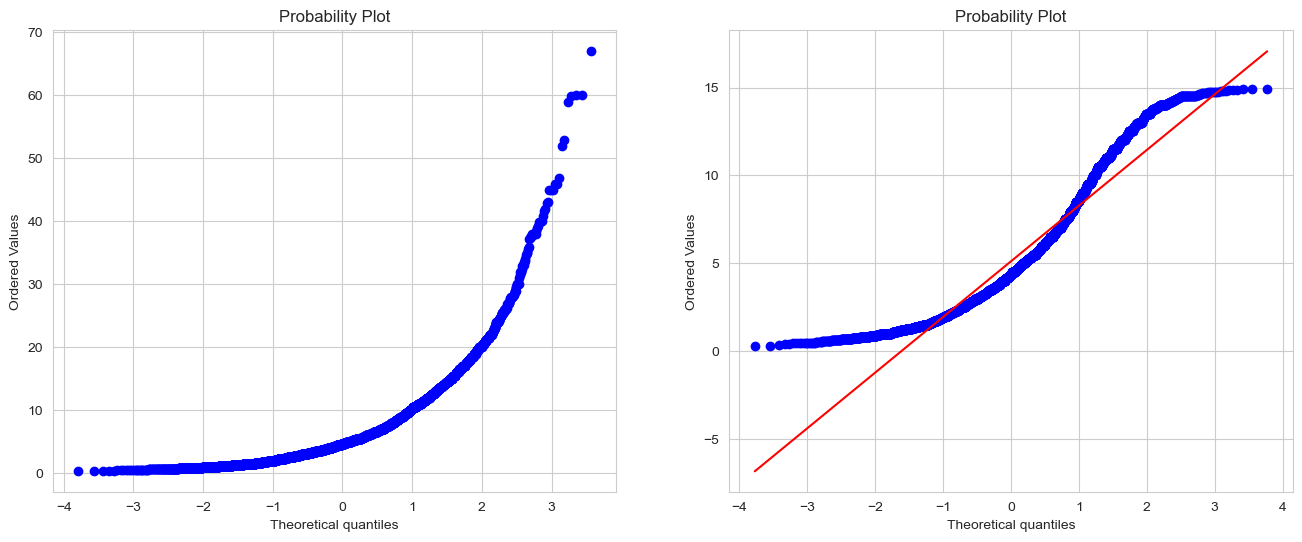

In [ ]:
#Probability plots before and after handling outliers
# A probability plot (probplot)—typically used in normality testing, is also a helpful visual tool for identifying outliers 
# and assessing distribution fit. 

# Points far from the line	        Possible outliers
# Points far at the ends only	    Outliers in tails
# Sudden jumps in spacing	        Data irregularities or outliers
# S-shape curve	                    Non-normality + possible outliers

sns.set_style('whitegrid')
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
stats.probplot(df[feature], plot=plt)

plt.subplot(1, 2, 2)
stats.probplot(df_cleaned[feature], plot=plt)